# Part 1: Wrangling

### Problem 1

In [52]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT Teams.yearID as Year, Teams.teamID as Team, Teams.franchID as Franchise, Rank, Teams.lgID as League, G, W, L, (CAST(W as FLOAT)/CAST(G as FLOAT) * 100) as Winning_Percentage, sum(salary) as Total_Payroll FROM Teams INNER JOIN Salaries ON (Teams.teamID = Salaries.teamID AND Teams.yearID = Salaries.yearID) WHERE (Teams.YearID >= 1985 and Teams.YearID <= 2014) GROUP BY Teams.teamID, Teams.yearID" 

team_salaries = pd.read_sql(salary_query, conn)
team_salaries

,Year,Team,Franchise,Rank,League,G,W,L,Winning_Percentage,Total_Payroll
0,1997,ANA,ANA,2,AL,162,84,78,51.851852,31135472.0
1,1998,ANA,ANA,2,AL,162,85,77,52.469136,41281000.0
2,1999,ANA,ANA,4,AL,162,70,92,43.209877,55388166.0
3,2000,ANA,ANA,3,AL,162,82,80,50.617284,51464167.0
4,2001,ANA,ANA,3,AL,162,75,87,46.296296,47535167.0
...,...,...,...,...,...,...,...,...,...,...
853,2010,WAS,WSN,5,NL,162,69,93,42.592593,61400000.0
854,2011,WAS,WSN,3,NL,161,80,81,49.689441,63856928.0
855,2012,WAS,WSN,1,NL,162,98,64,60.493827,80855143.0
856,2013,WAS,WSN,2,NL,162,86,76,53.086420,113703270.0


I used inner join because I wanted to exclude data that didn't have the sufficient variables for me to use (Basically the yearID and teamID on the Teams database that weren't present in the Salaries database or was missing and vice versa). This essentially got rid of missing data, which wouldn't be useful at all for determining how efficient teams have been historically at spending money and getting wins in return as they can only be used as estimates.

# Part 2: Exploratory Data Analysis

## Payroll Distribution

### Problem 2

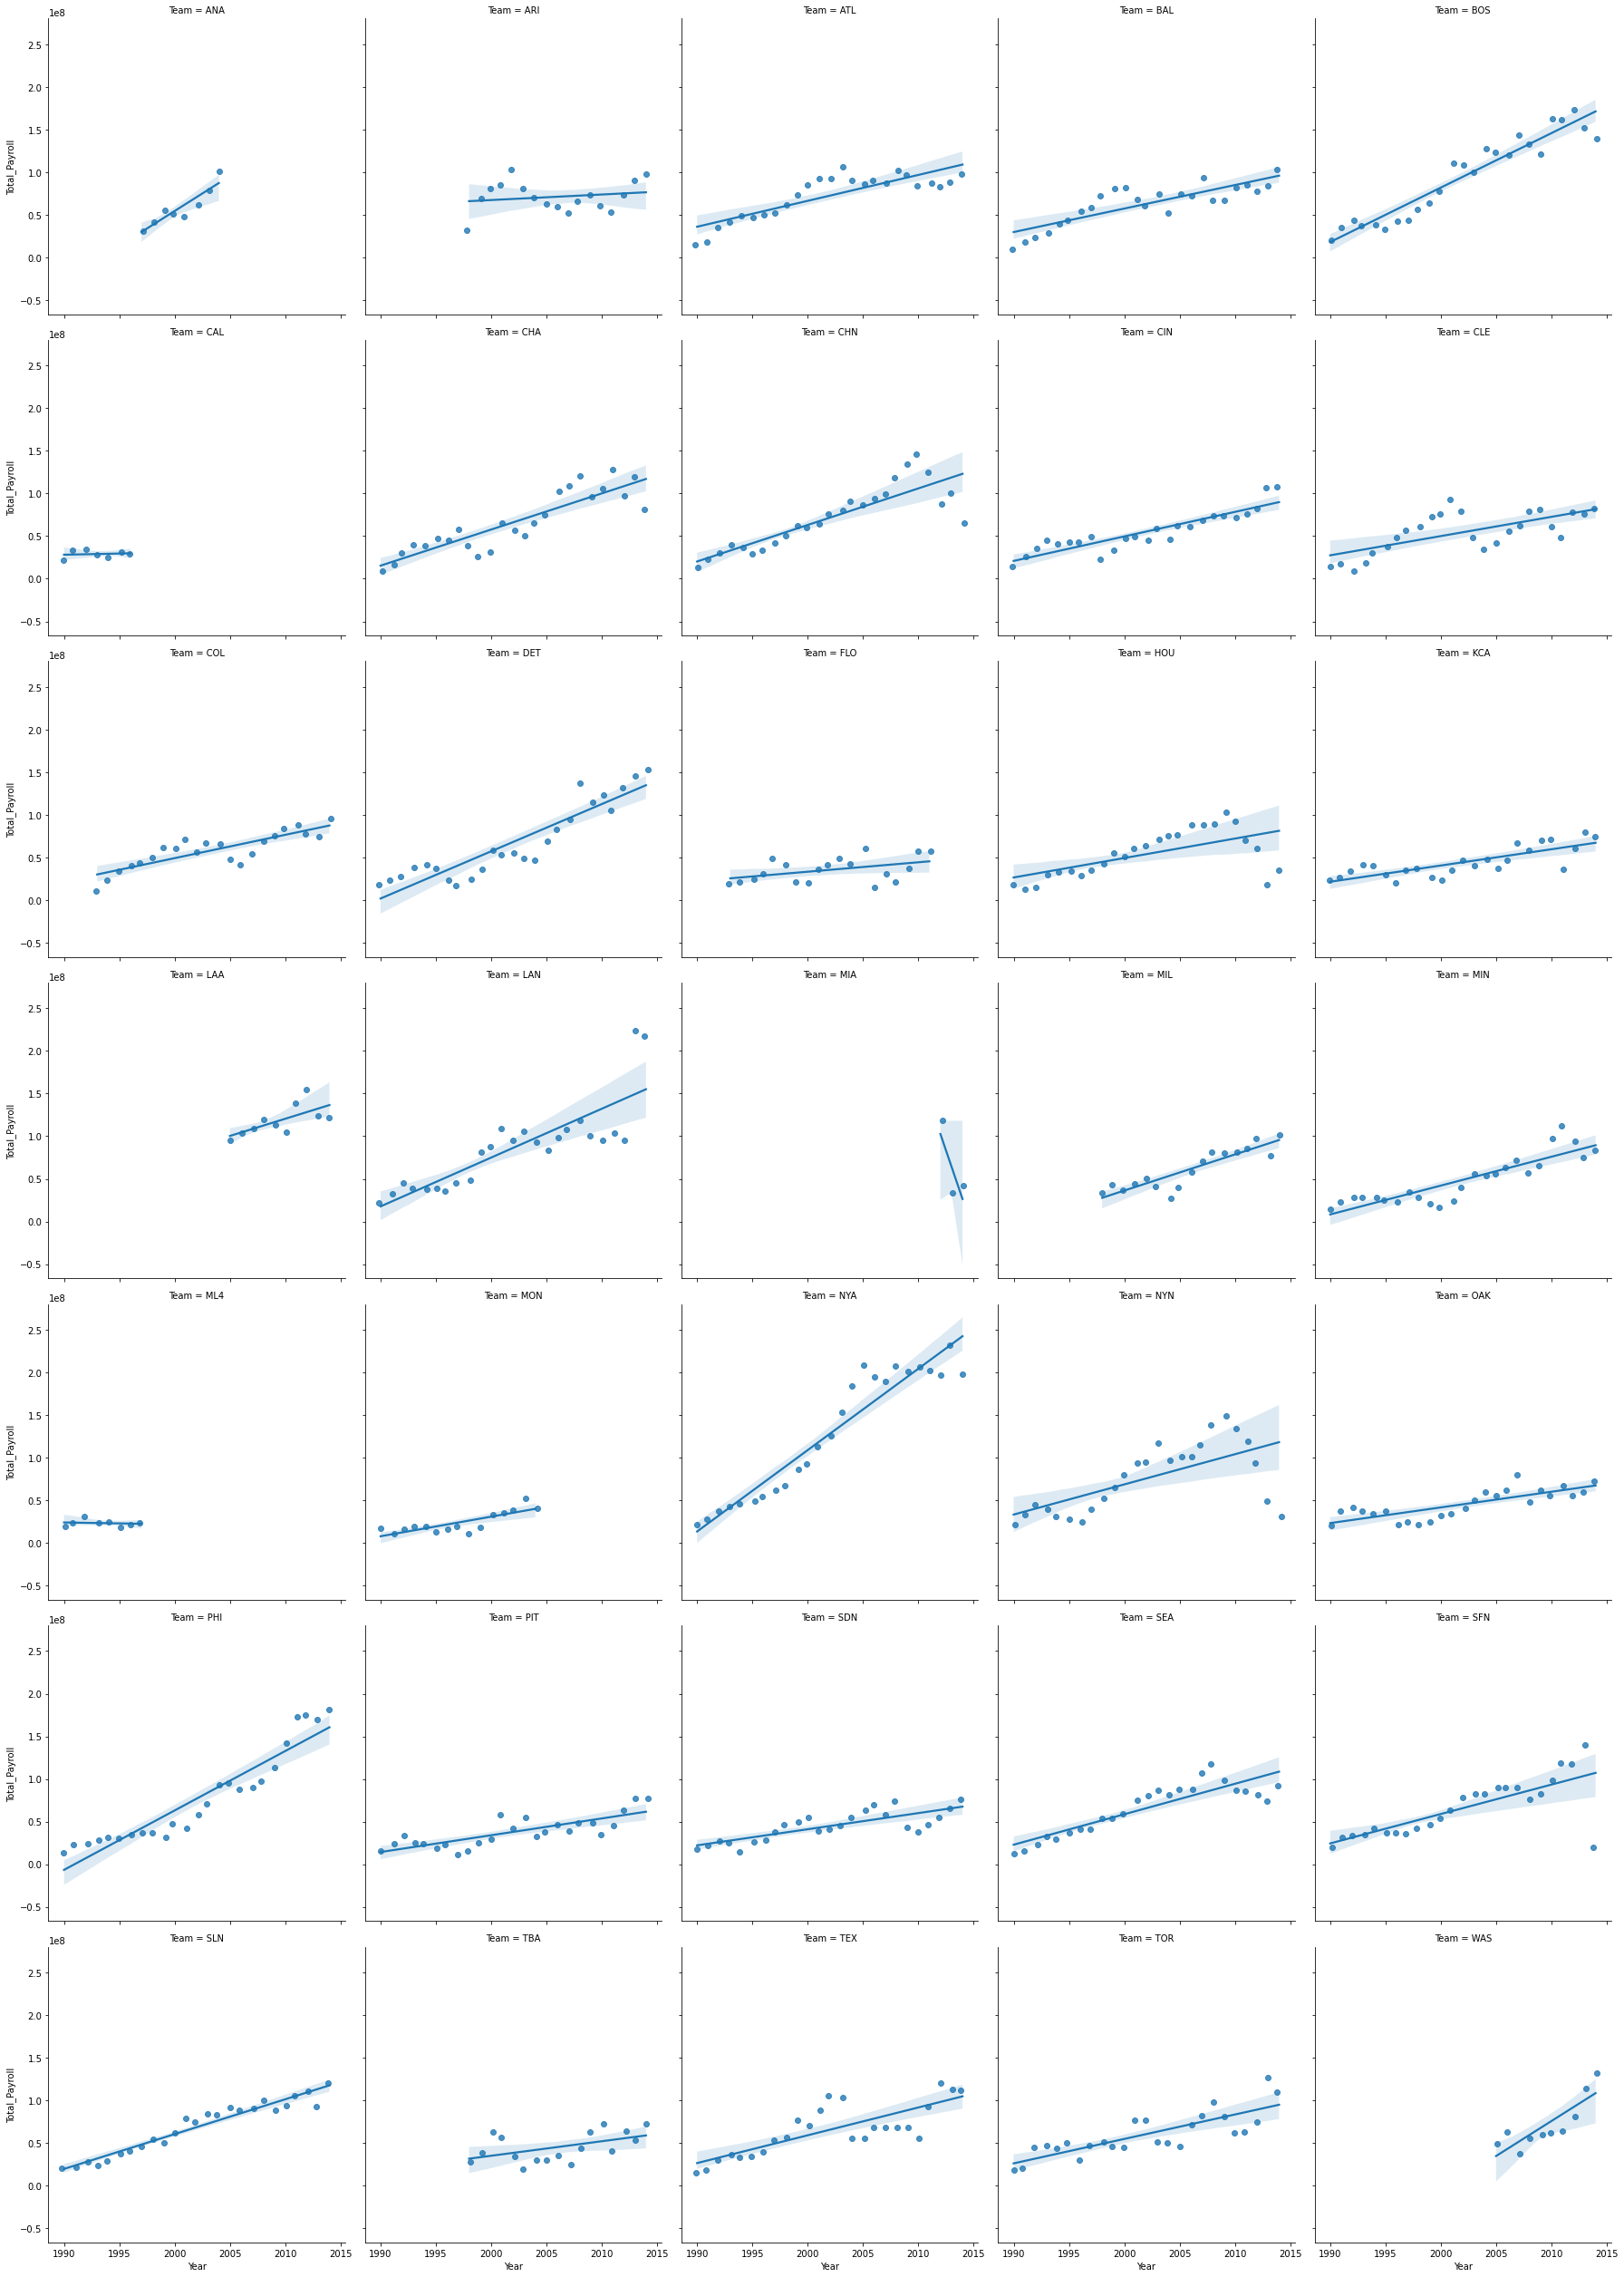

In [53]:
salary_query2 = "SELECT Teams.yearID as Year, Teams.teamID as Team, Teams.franchID as Franchise, Rank, Teams.lgID as League, G, W, L, (CAST(W as FLOAT)/CAST(G as FLOAT) * 100) as Winning_Percentage, sum(salary) as Total_Payroll FROM Teams INNER JOIN Salaries ON (Teams.teamID = Salaries.teamID AND Teams.yearID = Salaries.yearID) WHERE (Teams.YearID >= 1990 and Teams.YearID <= 2014) GROUP BY Teams.teamID, Teams.yearID"

#Data now starts from 1990 instead of 1985#
team_salaries2 = pd.read_sql(salary_query2, conn)

payroll_plots = sns.lmplot(x='Year', y='Total_Payroll', col='Team', data=team_salaries2, col_wrap=5,
               x_jitter=.2)
payroll_plots

#### Question 1

The above are scatter plots with lines of best fit the total payroll of every team from 1990 to 2014. The general trend is that as year increases, the payroll increases as well as the disparity between how much different teams can pay (spread). The only team where the payroll goes down is MIA, however there's only three data points for them which means there is still a possibility that they have increased their payroll over the past few years. Given that the spread is getting larger, the best way to determine the central tendency is the median. 

### Problem 3

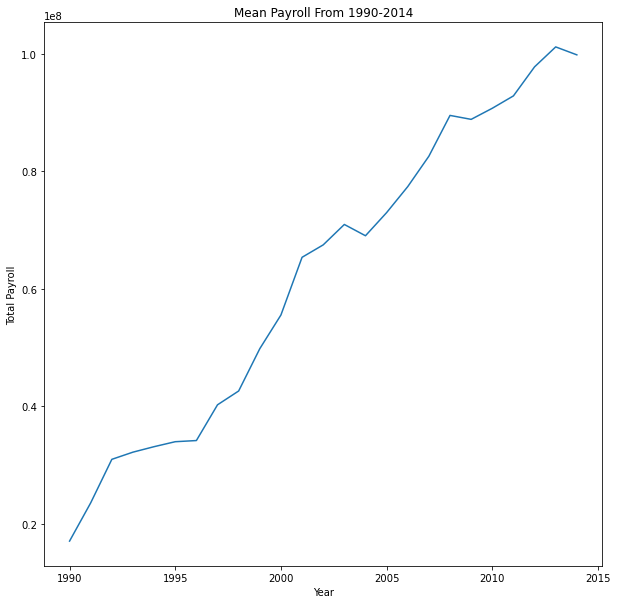

In [54]:
mean_payrolls = team_salaries2.groupby("Year")["Total_Payroll"].mean()
plt.figure(figsize = (10,10))
plt.plot(mean_payrolls.index, mean_payrolls.values)
plt.xlabel("Year")
plt.ylabel("Total Payroll")
plt.title("Mean Payroll From 1990-2014")
plt.show()

## Correlation between payroll and winning percentage

### Problem 4

<Figure size 432x288 with 0 Axes>

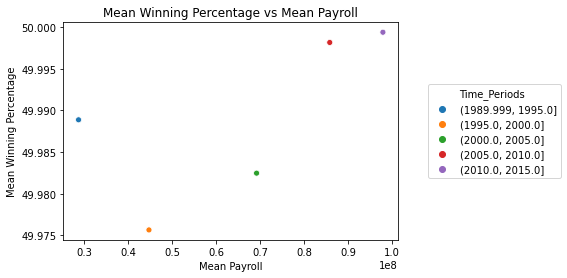

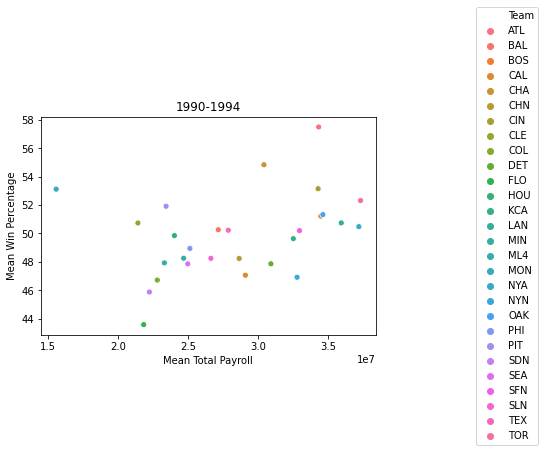

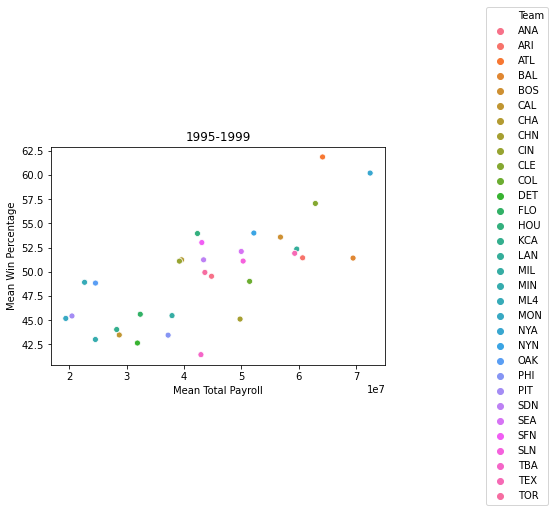

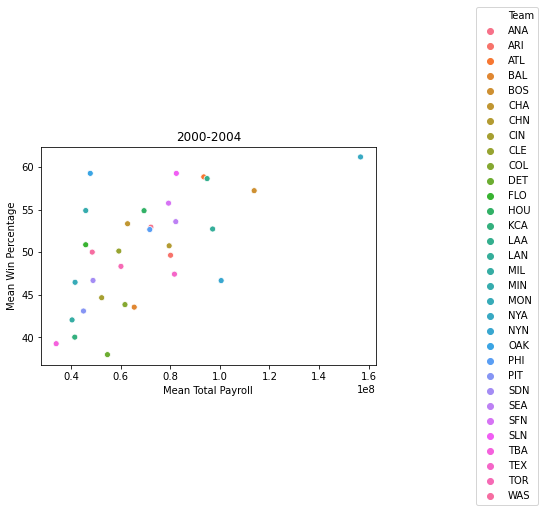

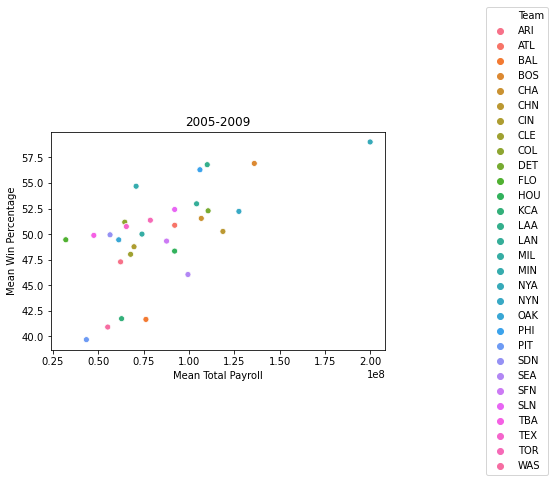

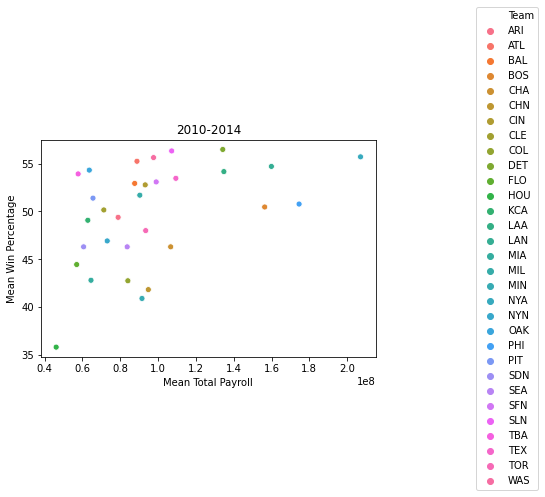

<Figure size 432x288 with 0 Axes>

In [89]:
team_salaries2['Time_Periods'] = pd.cut(x = team_salaries2["Year"], bins = [1990,1995,2000,2005,2010,2015], include_lowest=True)
team_salaries3 = team_salaries2.copy()
team_salaries3 = team_salaries3.sort_values(["Time_Periods"]).reset_index(drop = True)

mean_wins = team_salaries2.groupby("Time_Periods")["Winning_Percentage"].mean()
mean_payrolls = team_salaries2.groupby("Time_Periods")["Total_Payroll"].mean()
wins_vs_payrolls = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
wins_vs_payrolls.set_title("Mean Winning Percentage vs Mean Payroll")
wins_vs_payrolls.set(ylabel = "Mean Winning Percentage", xlabel = "Mean Payroll")
wins_vs_payrolls.legend(loc='center right', bbox_to_anchor=(1.5, .5))
plt.figure()

plot1_df = pd.DataFrame(columns=["Team","Winning_Percentage","Total_Payroll"])
for i in range(0,162):
    plot1_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,9]]
    plot1_df.index += 1

mean_wins = plot1_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot1_df.groupby("Team")["Total_Payroll"].mean()
plot1 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot1.set_title("1990-1994")
plot1.set(xlabel = "Mean Total Payroll", ylabel = "Mean Win Percentage")
plot1.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()
    
plot2_df = pd.DataFrame(columns=["Team","Winning_Percentage","Total_Payroll"])
for i in range(162,308):
    plot2_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,9]]
    plot2_df.index += 1

mean_wins = plot2_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot2_df.groupby("Team")["Total_Payroll"].mean()
plot2 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot2.set_title("1995-1999")
plot2.set(xlabel = "Mean Total Payroll", ylabel = "Mean Win Percentage")
plot2.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()

plot3_df = pd.DataFrame(columns=["Team","Winning_Percentage","Total_Payroll",])
for i in range(308,458):
    plot3_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,9]]
    plot3_df.index += 1

mean_wins = plot3_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot3_df.groupby("Team")["Total_Payroll"].mean()
plot3 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot3.set_title("2000-2004")
plot3.set(xlabel = "Mean Total Payroll", ylabel = "Mean Win Percentage")
plot3.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()

plot4_df = pd.DataFrame(columns=["Team","Winning_Percentage","Total_Payroll",])
for i in range(458,608):
    plot4_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,9]]
    plot4_df.index += 1

mean_wins = plot4_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot4_df.groupby("Team")["Total_Payroll"].mean()
plot4 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot4.set_title("2005-2009")
plot4.set(xlabel = "Mean Total Payroll", ylabel = "Mean Win Percentage")
plot4.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()

plot5_df = pd.DataFrame(columns=["Team","Winning_Percentage","Total_Payroll",])
for i in range(608,728):
    plot5_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,9]]
    plot5_df.index += 1

mean_wins = plot5_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot5_df.groupby("Team")["Total_Payroll"].mean()
plot5 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot5.set_title("2010-2014")
plot5.set(xlabel = "Mean Total Payroll", ylabel = "Mean Win Percentage")
plot5.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()


### Question 2

A common trend across all 5 periods is that as the mean payroll increases, so does the winrate. From 1990-1999, ATL (Atlanta Braves) was the team that had the highest winrates among those that spent the most but from 2000-2014, NYA (New York Yankees) took that spot. Both of these teams had around a 60% win rate during those time periods. As for OAK (Oakland A), they were a team that didn't spend as much as the other teams yet had a high win rate (around 55%). 

# Part 3: Data transformations

## Standardizing across years

### Problem 5

In [56]:
avg_payroll = team_salaries2.groupby("Year")["Total_Payroll"].mean()
sd_payroll = team_salaries2.groupby("Year")["Total_Payroll"].std()

team_salaries2["Average_Payroll"] = team_salaries2["Year"].apply(lambda i : avg_payroll[i])
team_salaries2["SD_Payroll"] = team_salaries2["Year"].apply(lambda i : sd_payroll[i])
team_salaries2["Standardized_Payroll"] = team_salaries2.apply(lambda i : (i.Total_Payroll - i.Average_Payroll) / i.SD_Payroll, axis=1)
team_salaries2

,Year,Team,Franchise,Rank,League,G,W,L,Winning_Percentage,Total_Payroll,Time_Periods,Average_Payroll,SD_Payroll,Standardized_Payroll
0,1997,ANA,ANA,2,AL,162,84,78,51.851852,31135472.0,"(1995.0, 2000.0]",4.026021e+07,1.306073e+07,-0.698639
1,1998,ANA,ANA,2,AL,162,85,77,52.469136,41281000.0,"(1995.0, 2000.0]",4.260943e+07,1.538081e+07,-0.086369
2,1999,ANA,ANA,4,AL,162,70,92,43.209877,55388166.0,"(1995.0, 2000.0]",4.980762e+07,2.056133e+07,0.271410
3,2000,ANA,ANA,3,AL,162,82,80,50.617284,51464167.0,"(1995.0, 2000.0]",5.553784e+07,2.141622e+07,-0.190214
4,2001,ANA,ANA,3,AL,162,75,87,46.296296,47535167.0,"(2000.0, 2005.0]",6.535544e+07,2.470771e+07,-0.721244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,2010,WAS,WSN,5,NL,162,69,93,42.592593,61400000.0,"(2005.0, 2010.0]",9.071200e+07,3.811503e+07,-0.769040
724,2011,WAS,WSN,3,NL,161,80,81,49.689441,63856928.0,"(2010.0, 2015.0]",9.281684e+07,4.081197e+07,-0.709594
725,2012,WAS,WSN,1,NL,162,98,64,60.493827,80855143.0,"(2010.0, 2015.0]",9.775804e+07,3.681754e+07,-0.459099
726,2013,WAS,WSN,2,NL,162,86,76,53.086420,113703270.0,"(2010.0, 2015.0]",1.011509e+08,4.883029e+07,0.257062


### Problem 6

<Figure size 432x288 with 0 Axes>

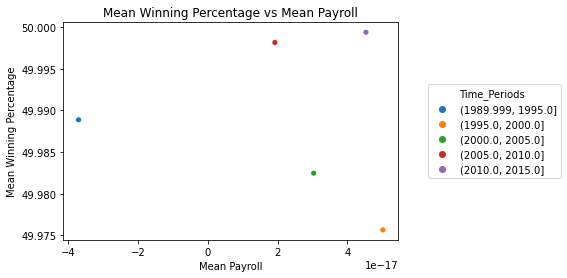

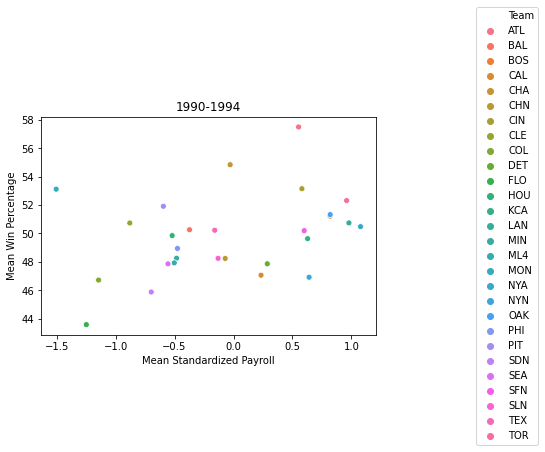

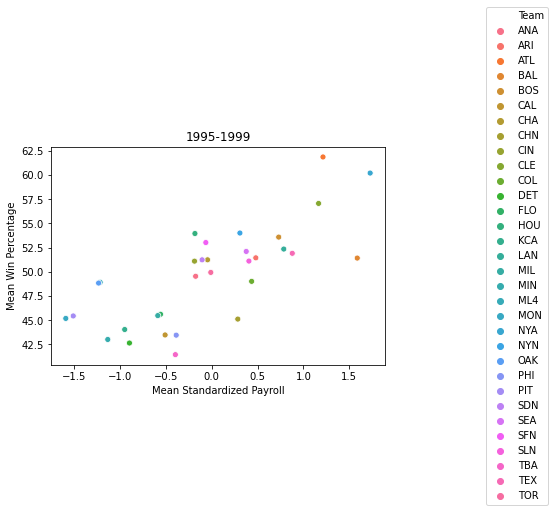

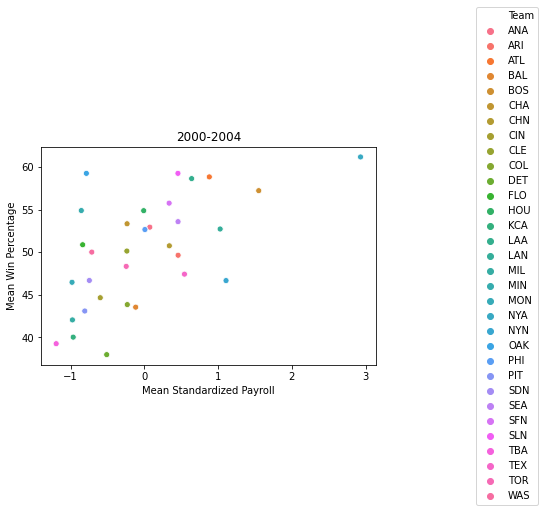

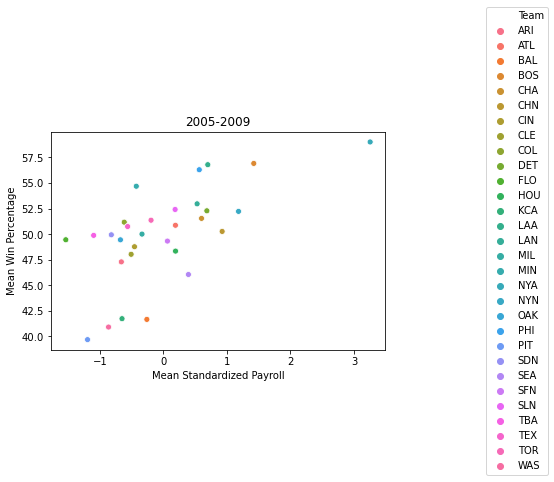

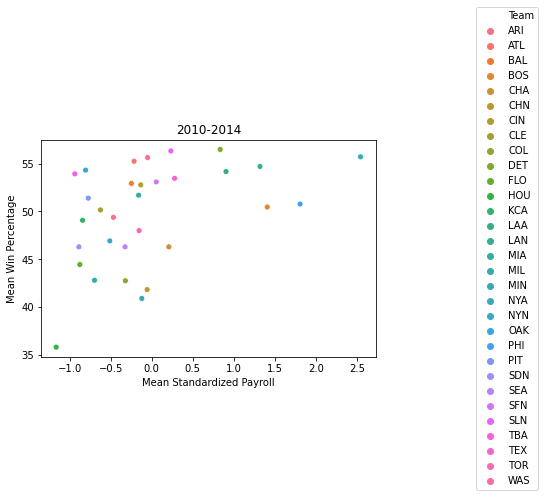

<Figure size 432x288 with 0 Axes>

In [57]:
team_salaries3 = team_salaries2.copy()
team_salaries3 = team_salaries3.sort_values(["Time_Periods"]).reset_index(drop = True)

mean_wins = team_salaries2.groupby("Time_Periods")["Winning_Percentage"].mean()
mean_payrolls = team_salaries2.groupby("Time_Periods")["Standardized_Payroll"].mean()
wins_vs_payrolls = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
wins_vs_payrolls.set_title("Mean Winning Percentage vs Mean Payroll")
wins_vs_payrolls.set(ylabel = "Mean Winning Percentage", xlabel = "Mean Payroll")
wins_vs_payrolls.legend(loc='center right', bbox_to_anchor=(1.5, .5))
plt.figure()

plot1_df = pd.DataFrame(columns=["Team","Winning_Percentage","Standardized_Payroll"])
for i in range(0,162):
    plot1_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,13]]
    plot1_df.index += 1

mean_wins = plot1_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot1_df.groupby("Team")["Standardized_Payroll"].mean()
plot1 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot1.set_title("1990-1994")
plot1.set(xlabel = "Mean Standardized Payroll", ylabel = "Mean Win Percentage")
plot1.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()
    
plot2_df = pd.DataFrame(columns=["Team","Winning_Percentage","Standardized_Payroll"])
for i in range(162,308):
    plot2_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,13]]
    plot2_df.index += 1

mean_wins = plot2_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot2_df.groupby("Team")["Standardized_Payroll"].mean()
plot2 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot2.set_title("1995-1999")
plot2.set(xlabel = "Mean Standardized Payroll", ylabel = "Mean Win Percentage")
plot2.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()

plot3_df = pd.DataFrame(columns=["Team","Winning_Percentage","Standardized_Payroll"])
for i in range(308,458):
    plot3_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,13]]
    plot3_df.index += 1

mean_wins = plot3_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot3_df.groupby("Team")["Standardized_Payroll"].mean()
plot3 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot3.set_title("2000-2004")
plot3.set(xlabel = "Mean Standardized Payroll", ylabel = "Mean Win Percentage")
plot3.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()

plot4_df = pd.DataFrame(columns=["Team","Winning_Percentage","Standardized_Payroll"])
for i in range(458,608):
    plot4_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,13]]
    plot4_df.index += 1

mean_wins = plot4_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot4_df.groupby("Team")["Standardized_Payroll"].mean()
plot4 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot4.set_title("2005-2009")
plot4.set(xlabel = "Mean Standardized Payroll", ylabel = "Mean Win Percentage")
plot4.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()

plot5_df = pd.DataFrame(columns=["Team","Winning_Percentage","Standardized_Payroll"])
for i in range(608,728):
    plot5_df.loc[-1] = [team_salaries3.iat[i,1], team_salaries3.iat[i,8],team_salaries3.iat[i,13]]
    plot5_df.index += 1

mean_wins = plot5_df.groupby("Team")["Winning_Percentage"].mean()
mean_payrolls = plot5_df.groupby("Team")["Standardized_Payroll"].mean()
plot5 = sns.scatterplot(x = mean_payrolls.values, y = mean_wins.values, hue = mean_wins.index)
plot5.set_title("2010-2014")
plot5.set(xlabel = "Mean Standardized Payroll", ylabel = "Mean Win Percentage")
plot5.legend(loc ='center right', bbox_to_anchor = (1.5, 0.5))
plt.figure()



### Question 3

The only change made from the plots in problem 4 was the x-axis, where it's now Mean Standardized Payroll instead of Mean Total Payroll, essentially causing the graphs to plot different values for each team. Standardized payroll shows the Z-scores of each team's payroll relative to the mean, which is represented by 0. You can use Z-scores to calculate the percentile of a team's payroll. 

## Expected Wins

### Problem 7

m = 2.7251036461557048
b = 49.988553148430164


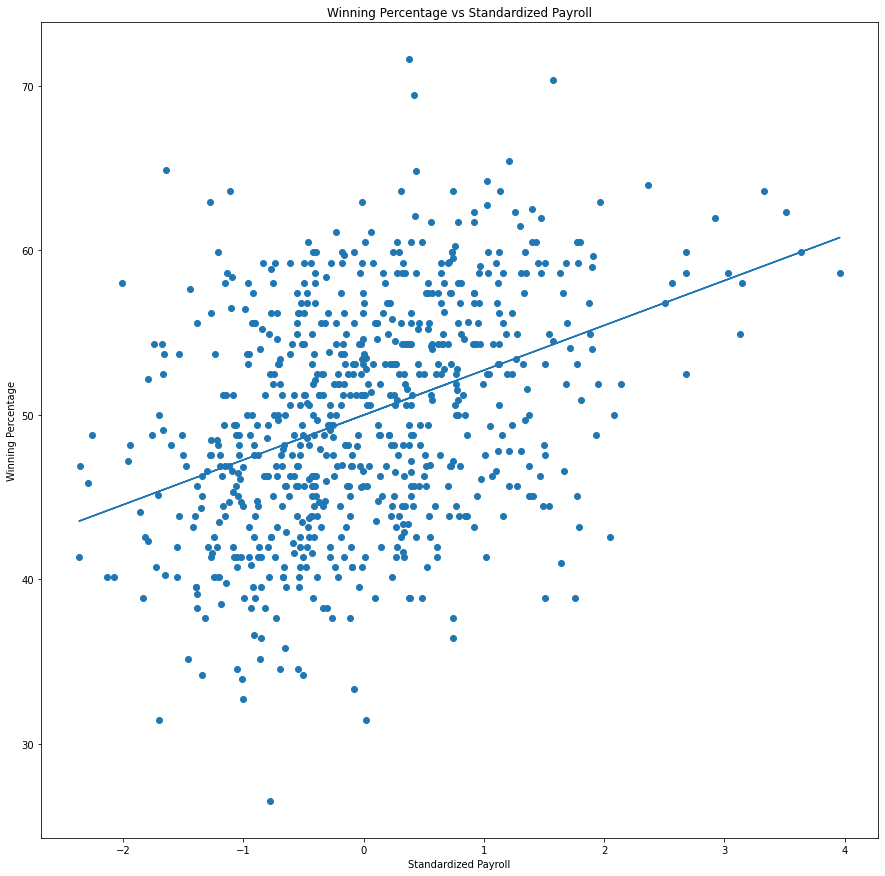

In [58]:
plt.figure(figsize=(15,15))
plt.scatter(x = team_salaries2["Standardized_Payroll"], y = team_salaries2["Winning_Percentage"])
plt.xlabel("Standardized Payroll")
plt.ylabel("Winning Percentage")
plt.title("Winning Percentage vs Standardized Payroll")

x = np.array(team_salaries2["Standardized_Payroll"])
y = np.array(team_salaries2["Winning_Percentage"])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

print("m = " + str(m))
print("b = " + str(b))

## Spending efficiency

### Problem 8

Text(0.5, 1.0, 'Spending Efficiency of Teams from 1990-2014')

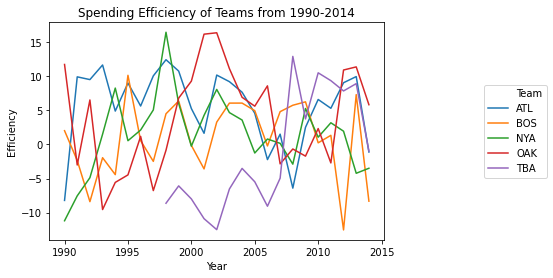

In [103]:
team_salaries4 = pd.DataFrame(columns = team_salaries2.columns)

#OAK, BOS, NYA, ATL, TBA
for i,rows in team_salaries2.iterrows():
    if rows['Team'] == "OAK" or rows['Team'] == "BOS" or rows['Team'] == "NYA" or rows['Team'] == "ATL" or rows['Team'] == "TBA":
        team_salaries4.loc[-1] = rows
        team_salaries4.index += 1
        
team_salaries4["Efficiency"] = team_salaries4.apply(lambda i: i.Winning_Percentage - (50 + 2.5 * i.Standardized_Payroll), axis = 1)

plot = sns.lineplot(x = "Year", y = "Efficiency", hue = "Team", data = team_salaries4)
plot.legend(loc= 'center right', bbox_to_anchor=(1.5, 0.5))
plot.set_title("Spending Efficiency of Teams from 1990-2014")

### Question 4

This plot does a much better job at showing how efficient teams are at spending their money than the plots from questions 2 and 3. Although NYA (New York Yankees) was ranked as the team with the highest winrates during 2000-2014, they certainly weren't the most efficient at spending that money and if other teams on the graph had as much money as they did, the other teams would certainly have a much higher winrate. OAK (Oakland A) certainly was the most efficienct team during the 2000-2005 time period which was during the Moneyball era. They reached a 15+ efficieny score which was the highest ever recorded during 1990-2014 along side NYA (New York Yankees) during 1997-1998. 